In [ ]:
! pip install gradio_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00


In [ ]:
import gradio_client
import re
import io
import base64

from gradio_client import Client
from PIL import Image

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loaded as API: https://wcy1122-mgm.hf.space ✔


In [ ]:
client = Client("wcy1122/Mini-Gemini")

result = client.predict(
		api_name="/clear_history"
)
print(result)

Loaded as API: https://wcy1122-mgm.hf.space ✔
([], '', None)


In [ ]:
result = client.predict(
		imagebox=None,
		textbox="Hello!!",
		image_process_mode="Default",
		gen_image="No",
		temperature=0.2,
		top_p=0.7,
		max_output_tokens=512,
		api_name="/generate_1"
)
print(result)

([['Hello!!', "Hello! How can I help you today? Is there something you would like to talk about or ask me a question? I'm here to assist you with any questions you may have."]], '', None)


([['What is 김치찌개? Explain its ingredients and generate an image of the korean dish. <GEN>', '김치찌개 is a traditional Korean soup made with kimchi, a fermented vegetable dish, and gochujang, a spicy pepper paste. The soup is typically served with rice and is known for its spicy and tangy flavor.\n\nThe main ingredients of 김치찌개 include:\n\n* Kimchi: fermented vegetables, usually made from cabbage, radish, or cucumber, and seasoned with chili pepper, garlic, ginger, and other spices.\n* Gochujang: a spicy pepper paste made from red pepper, soybean paste, and sugar.\n* Water: to dilute the gochujang and kimchi.\n* Salt: to adjust the seasoning.\n\nHere is an image of 김치찌개:\n\nPrompt:  A bowl of spicy kimchi stew with chunks of kimchi and gochujang, served with a side of rice, in a traditional Korean setting']], '', None)

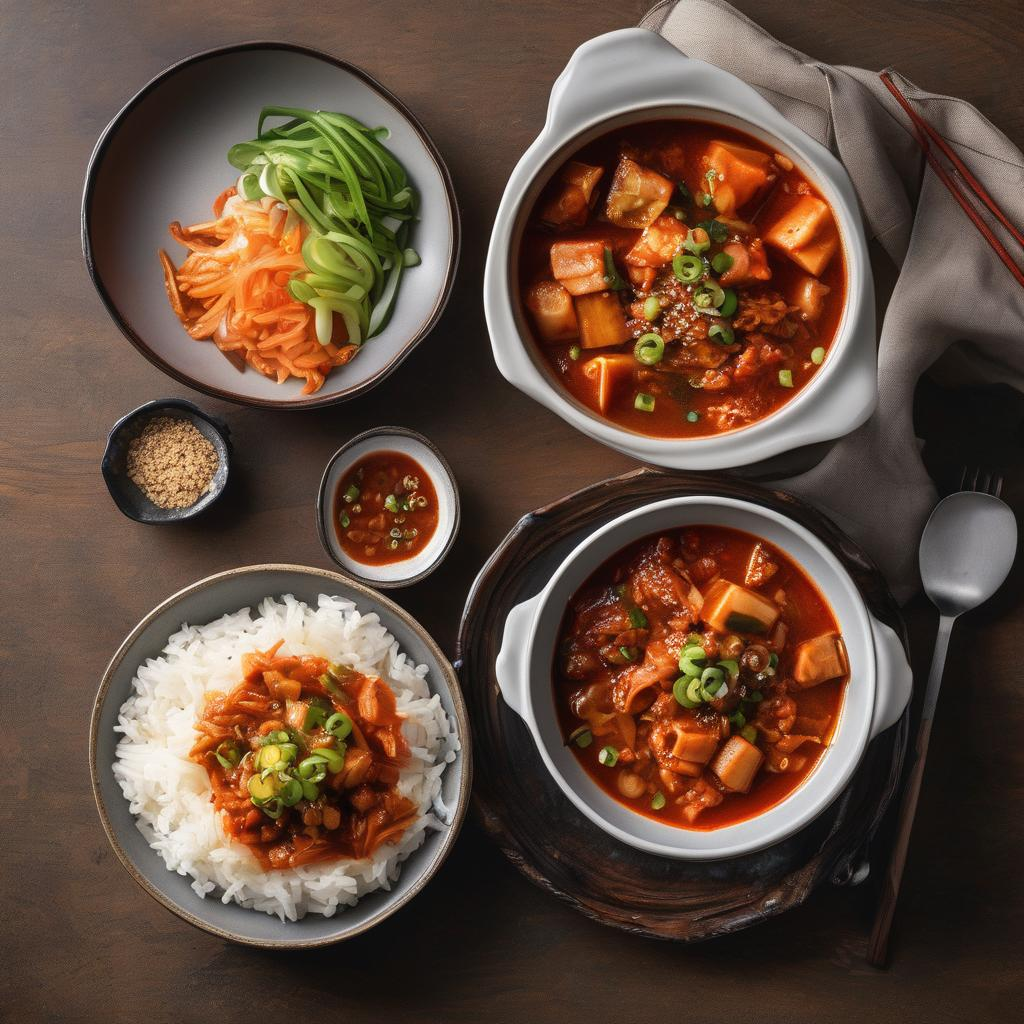

In [ ]:
result = client.predict(
		imagebox=None,
		textbox="What is 김치찌개? Explain its ingredients and generate an image of the korean dish.",
		image_process_mode="Default",
		gen_image="Yes",
		temperature=0.2,
		top_p=0.7,
		max_output_tokens=512,
		api_name="/generate_1"
)

pattern = r'src="data:image/jpeg;base64,([^"]+)"'

resultstr = str(result)
imagecode = re.findall(pattern, resultstr)

In [ ]:
# base64로 인코딩된 이미지 데이터
base64_image_data = imagecode[0]
# base64 디코딩
image_data = base64.b64decode(base64_image_data)

# 이미지를 메모리에 로드
image = Image.open(io.BytesIO(image_data))

# 이미지 표시
image.show()
image.save("save path")